<a href="https://colab.research.google.com/github/abdullatif14/KNN-and-Naive-Bayes-week9/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Reading and cleaning the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
spam = pd.read_csv('/content/spambase (2).data')
spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [3]:
print(spam.shape)
print(spam.info())

(4600, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   fl

In [4]:
#checking for missing for values
spam.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

In [5]:
# lets check for duplicates
spam.duplicated().sum()

391

In [7]:

#dropping duplicates
#
spam1=spam.copy()
spam1.drop_duplicates(inplace = True)
#
#confirming no duplicates
spam1.duplicated().any()

False

In [8]:
spam1.shape

(4209, 58)

In [10]:
#no missing values in our dataset
#lets check for unique values
spam1.nunique()

0          142
0.64       171
0.64.1     214
0.1         43
0.32       255
0.2        141
0.3        173
0.4        170
0.5        144
0.6        245
0.7        113
0.64.2     316
0.8        158
0.9        133
0.10       118
0.32.1     253
0.11       197
1.29       229
1.93       575
0.12       148
0.96       401
0.13        99
0.14       164
0.15       143
0.16       395
0.17       281
0.18       240
0.19       200
0.20       156
0.21       179
0.22       128
0.23       106
0.24       184
0.25       110
0.26       177
0.27       159
0.28       188
0.29        53
0.30       163
0.31       125
0.32.2     108
0.33       186
0.34       136
0.35       160
0.36       230
0.37       227
0.38        38
0.39       106
0.40       313
0.41       641
0.42       225
0.778      963
0.43       504
0.44       316
3.756     2160
61         271
278        919
1            2
dtype: int64

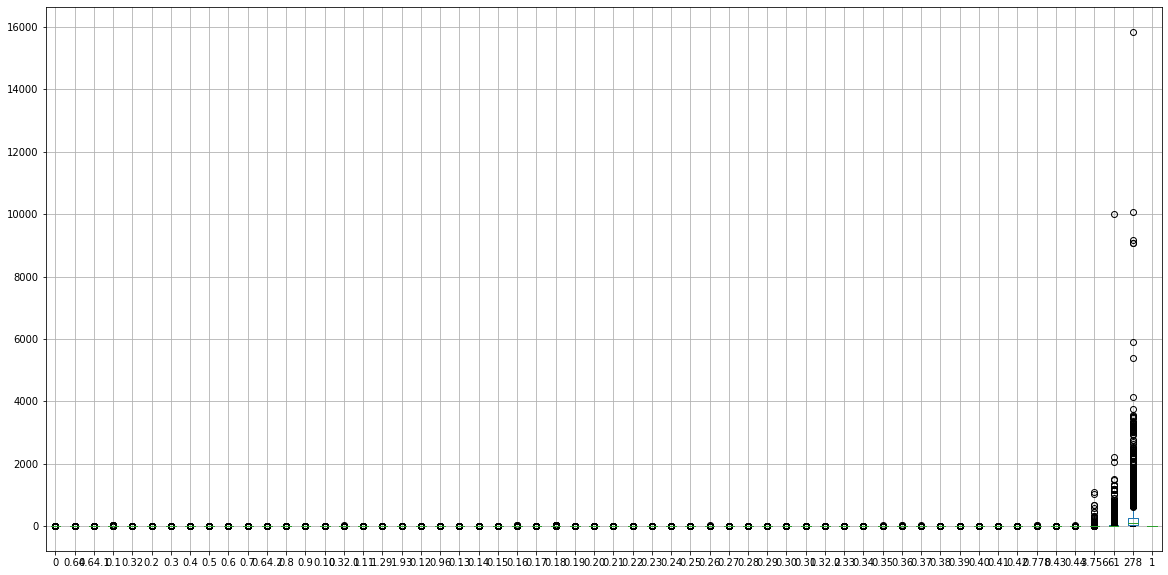

In [11]:
#Lets see if there any outliers in our datasets
#
plt.figure(figsize = (20, 10))
spam1.boxplot()
plt.show()

**Univariate Analysis**

In [12]:
# we can literally see there outliers in our datasets
# we wont drop them since they might useful to our data
# Lets see our data's central tendency
spam1.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,0.056700,0.565187,0.097679,0.061226,0.044813,0.253813,0.149190,0.188494,1.718318,0.084982,0.810005,0.131618,0.100646,0.090991,0.574132,0.279397,0.369926,0.128605,0.098406,0.103804,0.063559,0.044928,0.102357,0.045788,0.107907,0.099392,0.143516,0.014193,0.084077,0.061292,0.041442,0.141575,0.048784,0.085286,0.320200,0.189420,0.005788,0.034754,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,0.184186,0.882617,0.309342,0.346106,0.242214,0.797629,0.457718,0.540931,1.768967,0.505641,1.149486,1.071384,0.351375,0.431772,1.676715,0.905650,1.775532,0.535489,0.576863,0.439618,0.387312,0.300783,0.569211,0.301847,0.530323,0.386513,0.424553,0.230539,0.448043,0.319556,0.318214,0.793895,0.231898,0.646171,1.046027,0.928413,0.079180,0.298556,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.830000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,2.720000,0.000000,1.280000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [13]:

spam1.skew()

0          5.869174
0.64      13.469992
0.64.1     2.981163
0.1       27.206298
0.32       4.696383
0.2        6.121954
0.3        6.807907
0.4        9.733134
0.5        5.283655
0.6        8.567742
0.7        5.077637
0.64.2     2.827737
0.8        6.889161
0.9       11.562773
0.10       7.512445
0.32.1     9.386713
0.11       5.566994
1.29       5.460726
1.93       1.524163
0.12      15.428380
0.96       2.245546
0.13       9.540365
0.14       5.858801
0.15      15.554934
0.16       5.638166
0.17       6.296725
0.18       9.480457
0.19       6.517190
0.20      11.682205
0.21       6.380035
0.22      13.513262
0.23      10.431202
0.24      13.067827
0.25      10.338588
0.26      15.999956
0.27       7.357896
0.28       5.125989
0.29      27.075473
0.30      11.760923
0.31       9.100751
0.32.2    11.467421
0.33       9.184045
0.34       7.407316
0.35      18.194683
0.36       8.916894
0.37      10.075844
0.38      19.296179
0.39      18.869525
0.40      13.354309
0.41      14.002040


In [14]:
spam1.kurt()

0           54.339151
0.64       306.825353
0.64.1      12.942991
0.1        788.181917
0.32        37.055261
0.2         71.587871
0.3         76.364195
0.4        167.512933
0.5         48.000201
0.6        162.507930
0.7         34.647391
0.64.2      12.092765
0.8         82.577972
0.9        219.593696
0.10        69.476466
0.32.1     157.654883
0.11        43.503767
1.29        48.252636
1.93         4.996395
0.12       424.587575
0.96         8.091939
0.13        99.641352
0.14        49.108016
0.15       340.098477
0.16        43.172222
0.17        63.058333
0.18       111.073227
0.19        58.654817
0.20       189.363770
0.21        49.092933
0.22       302.299245
0.23       128.264533
0.24       290.668809
0.25       126.406363
0.26       491.430934
0.27        79.969161
0.28        40.878283
0.29       836.030092
0.30       205.911019
0.31       101.095615
0.32.2     166.221480
0.33       108.968215
0.34        73.777288
0.35       448.911933
0.36       122.040819
0.37      

**Bivariate Analysis**

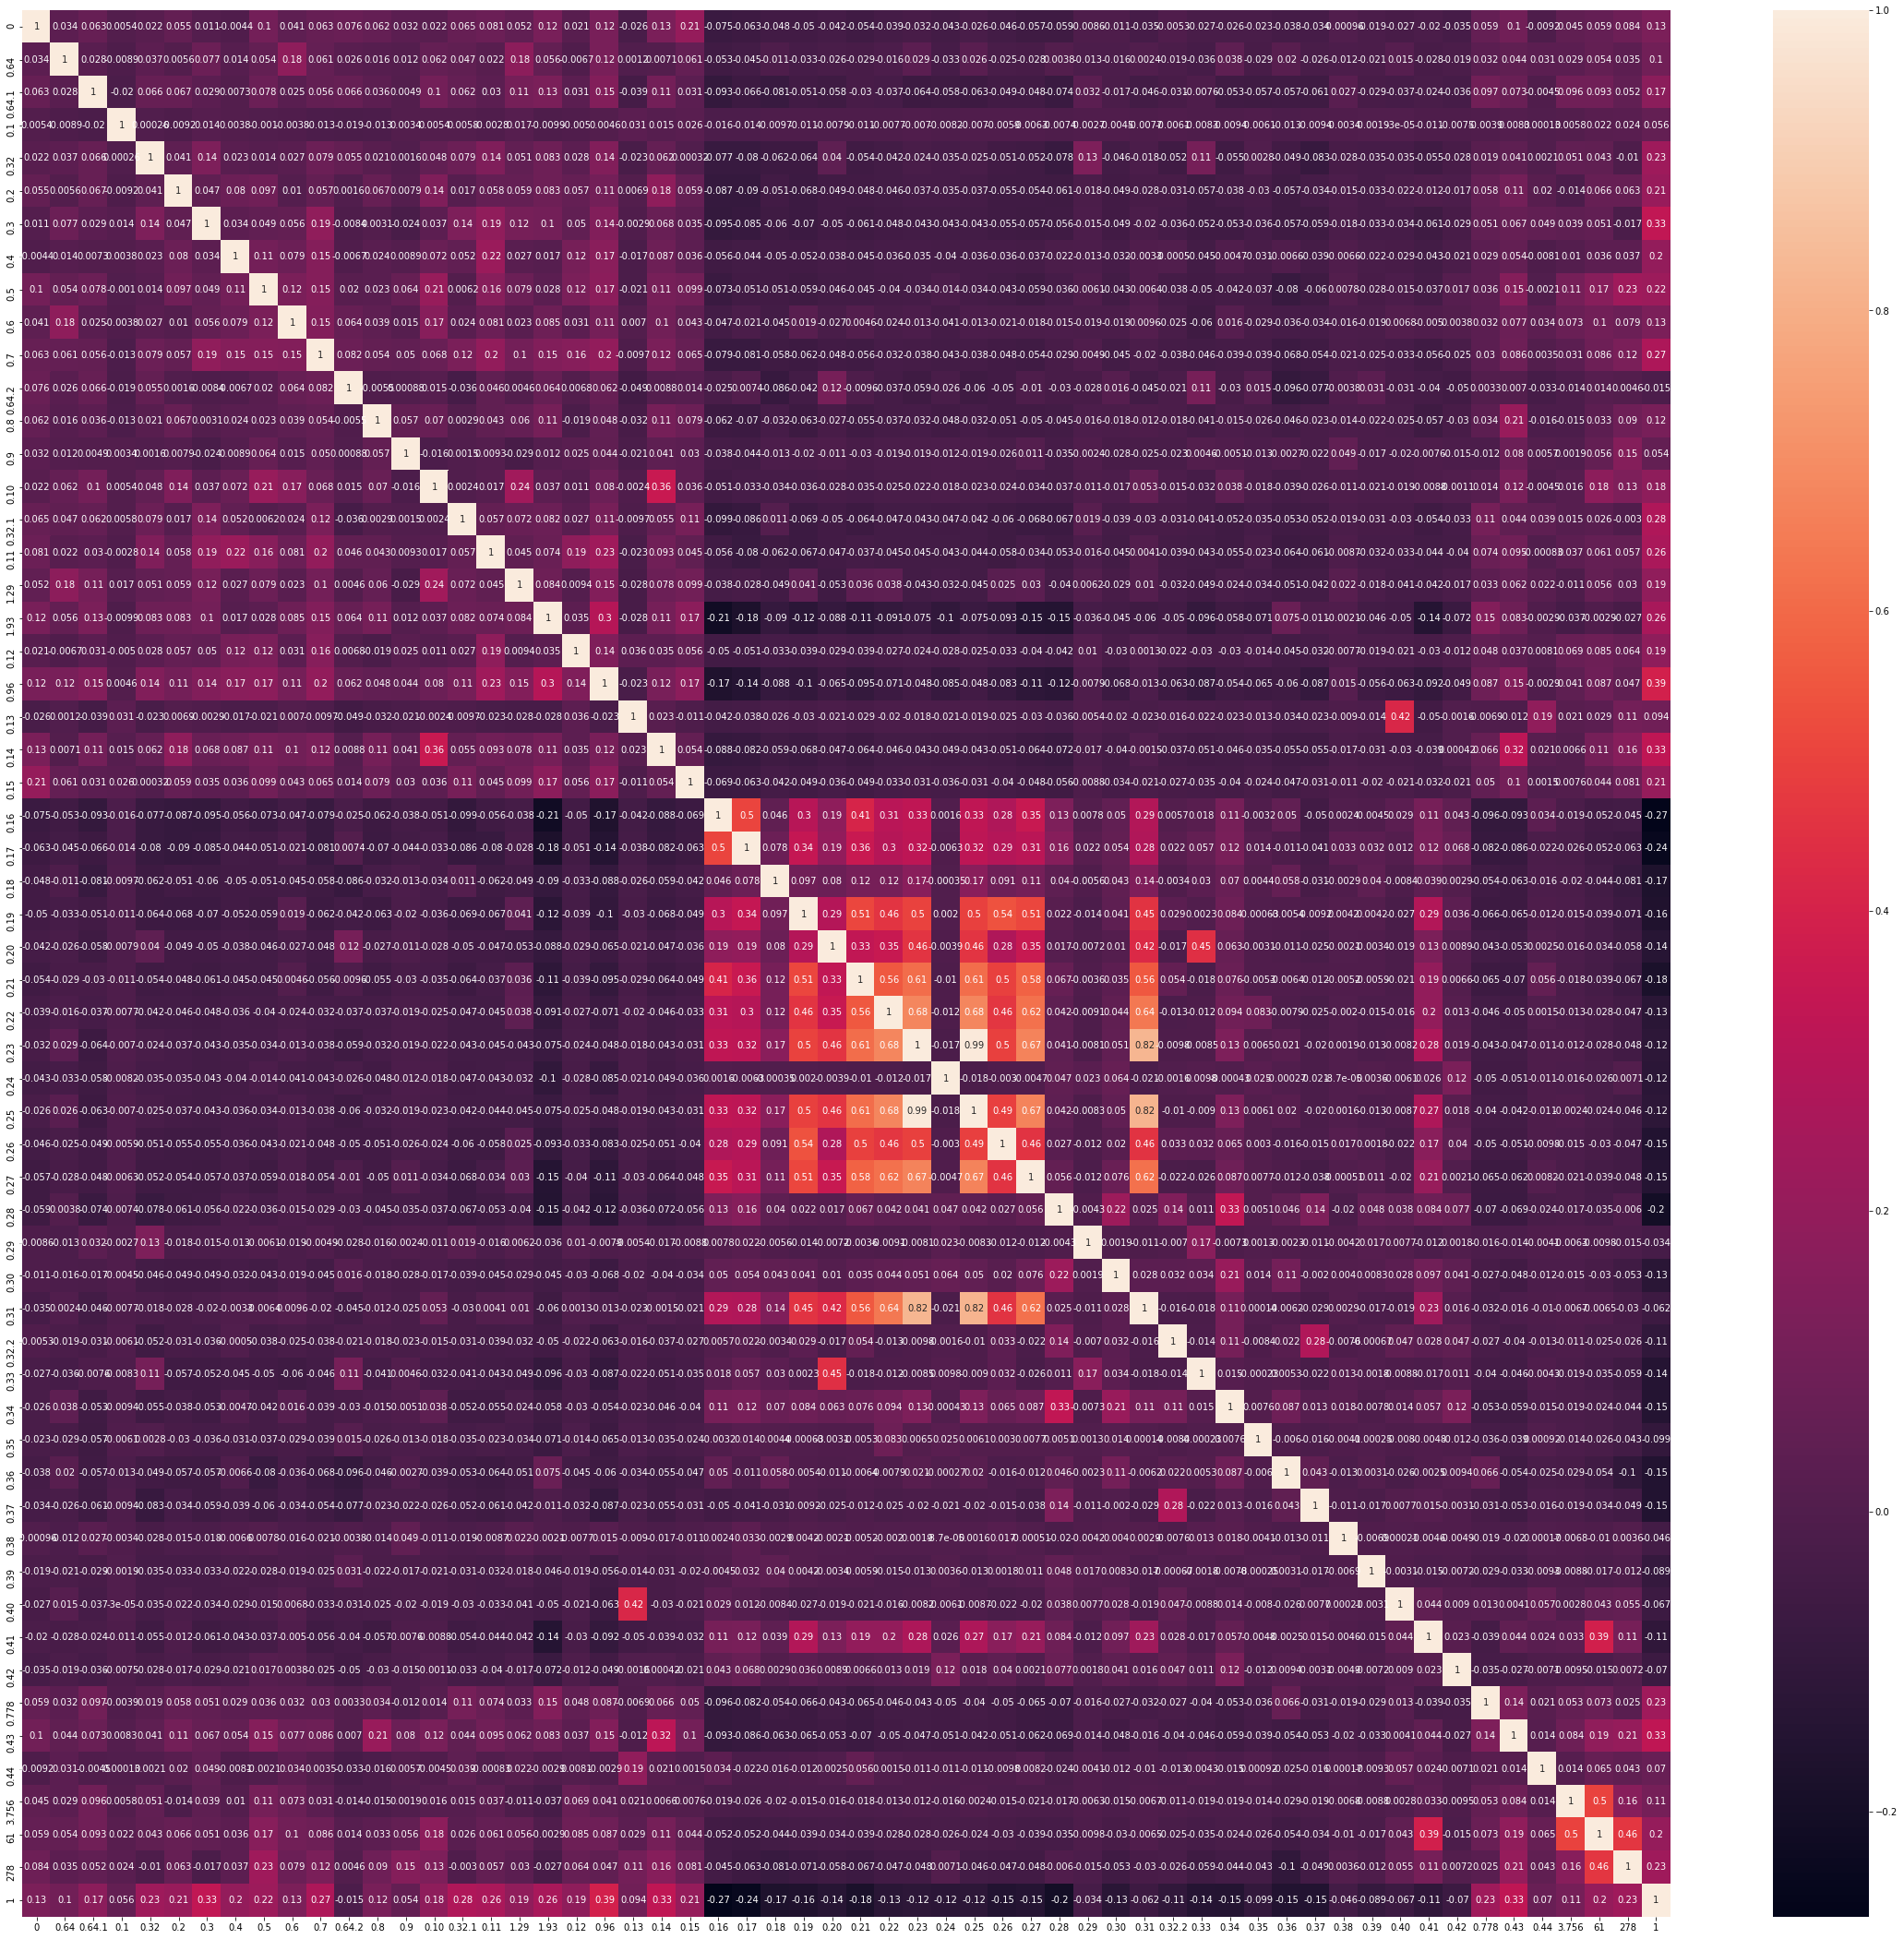

In [15]:
# Lets check for correlations
#
plt.subplots(figsize=(40,38))
sns.heatmap(spam1.corr(),annot=True)

In [16]:
# correlations
spam1.corr()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,0.063007,0.075919,0.061960,0.032249,0.022439,0.065451,0.081447,0.051765,0.120575,0.020910,0.121471,-0.025585,0.126457,0.205676,-0.075085,-0.063494,-0.048104,-0.050075,-0.041556,-0.054262,-0.038913,-0.031647,-0.042731,-0.026335,-0.046101,-0.057318,-0.058801,-0.008632,-0.011215,-0.035484,-0.005291,-0.026562,-0.025621,-0.022991,-0.037874,-0.034472,-0.000956,-0.018914,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
0.64,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,0.060819,0.026228,0.015628,0.012465,0.061887,0.046615,0.022112,0.178408,0.055852,-0.006690,0.117780,0.001249,0.007145,0.061350,-0.053488,-0.044550,-0.011172,-0.032939,-0.026005,-0.029359,-0.015895,0.028897,-0.032530,0.026085,-0.025472,-0.028196,0.003843,-0.012693,-0.016159,0.002379,-0.019317,-0.035865,0.037745,-0.029024,0.020116,-0.025952,-0.012319,-0.020919,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
0.64.1,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,0.055700,0.065723,0.036484,0.004928,0.104609,0.061927,0.029889,0.110528,0.126490,0.030903,0.147883,-0.039446,0.106747,0.031186,-0.092635,-0.066418,-0.081269,-0.051435,-0.057823,-0.030483,-0.036585,-0.063558,-0.057977,-0.063396,-0.048938,-0.047555,-0.074279,0.031767,-0.017389,-0.045985,-0.030803,-0.007592,-0.052705,-0.056865,-0.056554,-0.060529,0.027397,-0.029448,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
0.1,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,-0.013195,-0.018576,-0.013156,0.003377,0.005373,0.005799,-0.002831,0.016592,-0.009932,-0.005008,0.004578,0.030587,0.014712,0.025849,-0.015706,-0.014033,-0.009712,-0.010632,-0.007933,-0.010914,-0.007656,-0.006969,-0.008248,-0.006977,-0.005909,-0.006312,-0.007440,-0.002724,-0.004508,-0.007656,-0.006076,-0.008320,-0.009387,-0.006115,-0.013182,-0.009434,-0.003410,-0.001862,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
0.32,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,0.079165,0.055008,0.020656,0.001586,0.048309,0.079199,0.137869,0.050814,0.083092,0.027838,0.142992,-0.022716,0.062136,0.000320,-0.076785,-0.079809,-0.062483,-0.064151,0.039627,-0.053614,-0.042054,-0.024256,-0.034750,-0.024556,-0.051059,-0.052211,-0.077684,0.133057,-0.045513,-0.017580,-0.052325,0.107706,-0.054583,0.002770,-0.049499,-0.083315,-0.028146,-0.035040,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
0.2,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,0.056568,0.001589,0.067254,0.007918,0.139996,0.016688,0.057658,0.059395,0.083323,0.057489,0.105705,0.006859,0.181734,0.059413,-0.086713,-0.089548,-0.050829,-0.067792,-0.048913,-0.048282,-0.046362,-0.036538,-0.035047,-0.037102,-0.055412,-0.054320,-0.060639,-0.018425,-0.049239,-0.027739,-0.030909,-0.056557,-0.037628,-0.030185,-0.057496,-0.034381,-0.014747,-0.033488,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402,0.212455
0.3,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,0.186777,-0.008432,0.003143,-0.023831,0.037425,0.135882,0.189635,0.115648,0.102598,0.049664,0.143781,-0.002944,0.068424,0.034532,-0.095021,-0.084690,-0.060474,-0.070284,-0.050273,-0.061318,-0.047909,-0.042713,-0.043030,-0.043152,-0.055224,-0.057370,-0.055945,-0.015450,-0.049438,-0.019723,-0

**Multicollinearity**

In [33]:
##Lets do VIF score and know the features 
# that are highly correlated
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
X = spam1.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,0,1.229443
1,0.64,1.173240
2,0.64.1,1.400624
3,0.1,1.006264
4,0.32,1.324895
5,0.2,1.192636
6,0.3,1.216058
7,0.4,1.173640
8,0.5,1.314236
9,0.6,1.275231


In [36]:
X = spam1.drop(['0.23','0.25'],axis=1)
calc_vif(X)

,variables,VIF
0,0,1.225296
1,0.64,1.160105
2,0.64.1,1.410424
3,0.1,1.010535
4,0.32,1.375470
5,0.2,1.209898
6,0.3,1.298578
7,0.4,1.190924
8,0.5,1.319898
9,0.6,1.274505


Now we can proceed with our analysis without correlations

##Feature Engineering

In [37]:
# Preprocessing 
# lets normalzie our data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(spam1)

In [38]:
# split the data into features and labels
# Splitting to features and labels 
X = spam1.drop('1',axis=1)
y = spam1['1']

###Modelling

**80-20 split**

In [39]:

# Splitting to test and train dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

##Multinomial Naive-Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [41]:
y_pred = model.predict(X_test)

In [42]:

# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7921615201900237

In [43]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[423  72]
 [103 244]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       495
           1       0.77      0.70      0.74       347

    accuracy                           0.79       842
   macro avg       0.79      0.78      0.78       842
weighted avg       0.79      0.79      0.79       842



**70-30 split**

In [44]:
# Splitting to test and train dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [45]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [46]:
y_pred = model.predict(X_test)

In [47]:
# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7830562153602534

In [48]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[634 103]
 [171 355]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       737
           1       0.78      0.67      0.72       526

    accuracy                           0.78      1263
   macro avg       0.78      0.77      0.77      1263
weighted avg       0.78      0.78      0.78      1263



**60-40 split**

In [49]:
# Splitting to test and train dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [50]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [51]:
y_pred = model.predict(X_test)

# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7707838479809976

In [52]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[843 151]
 [235 455]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       994
           1       0.75      0.66      0.70       690

    accuracy                           0.77      1684
   macro avg       0.77      0.75      0.76      1684
weighted avg       0.77      0.77      0.77      1684



The accuracy is less than expected lets use another form of classifications that will help in improving the accuracy of our model in determining whether the message is a spam or not


## Bernoullis Naive-Bayes

**80-20 split**

In [53]:
# Splitting our dataset into features/ indepedent and labels/ target variables
#The X contains attributes while y contains the labels.
X = spam1.drop(columns = ['1']).values
y = spam1['1'].values

In [54]:

#splitting our dataset into 80-20 train-test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
#Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(alpha=1,fit_prior=True, class_prior=None)

In [57]:

# Train model
model = clf.fit(X, y)

In [58]:
y_pred = model.predict(X_test)

# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8978622327790974

In [59]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[456  27]
 [ 59 300]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       483
           1       0.92      0.84      0.87       359

    accuracy                           0.90       842
   macro avg       0.90      0.89      0.89       842
weighted avg       0.90      0.90      0.90       842



**70-30 split**

In [60]:
#splitting our dataset into 70-30 train-test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(alpha=1,fit_prior=True, class_prior=None)

In [62]:
y_pred = model.predict(X_test)

# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.889944576405384

In [63]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[688  52]
 [ 87 436]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       740
           1       0.89      0.83      0.86       523

    accuracy                           0.89      1263
   macro avg       0.89      0.88      0.89      1263
weighted avg       0.89      0.89      0.89      1263



**60-40 split**

In [64]:
#splitting our dataset into 70-30 train-test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [65]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(alpha=1,fit_prior=True, class_prior=None)

In [66]:
y_pred = model.predict(X_test)

# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8877672209026128

In [67]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[924  64]
 [125 571]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       988
           1       0.90      0.82      0.86       696

    accuracy                           0.89      1684
   macro avg       0.89      0.88      0.88      1684
weighted avg       0.89      0.89      0.89      1684



*Findings*

•We found that in the split of 80-20 for both classifiers as ;

1.Multimonial = 79.2%

2.Bernoulli = 89.8%

Bernoulll had better accuracy score than multinomial